Lets start off with creating a basic plot: This will form the basis of our simulation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In most plots, we start with a function: F(x). As x varies, we get a corrosponding value of y for every point. We then plot the resulting (x,y) pair as a graph.

In [2]:
x_points = np.linspace(-np.pi, np.pi, 1000)
y_points = np.sin(x_points)

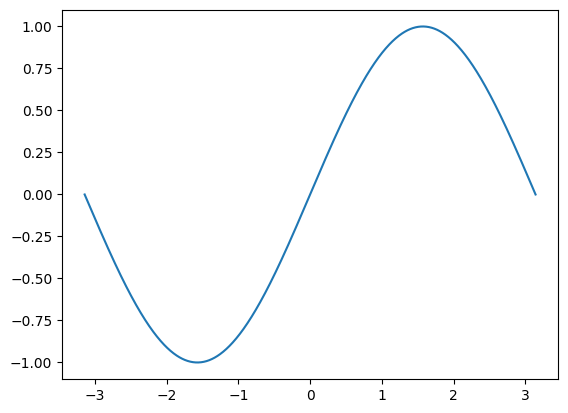

In [3]:
plt.plot(x_points, y_points)
plt.show()

Fairly simple - but that's not the case with a simulation. This is useful for making comparisons, but what we need is to see how things change with time. For these we use parametric equations; each variable changes with respect to time: x = F(t), y = G(t) and we plot (x, y).

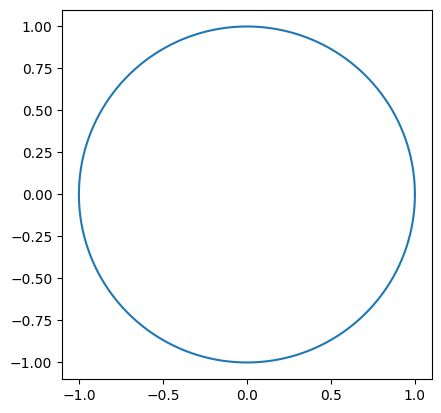

In [4]:
# start the basic parametric equation
time_step = np.linspace(0, 2*np.pi, 1000)
x2_points = np.cos(time_step)
y2_points = np.sin(time_step)

# set the aspect ratio
fig, ax = plt.subplots()
ax.set_aspect("equal")

# plot
plt.plot(x2_points, y2_points)
plt.show()

But parametric equations don't really tell us anything beyond a predetermined path through space. How would we model this if X and Y depended on each other in some manner? What if the direction that X and Y changed depended on their existing position? dx/dt = F(x, y), dy/dt = G(x, y) and we plot (x, y).

We get to something called Vector Fields. Think of a leaf in a swirling sink - where the leaf goes is dependent on where the leaf already is. At some places, the streams flow quickly, at others, the stream flows slowly. We can visualize this using a quiver plot.

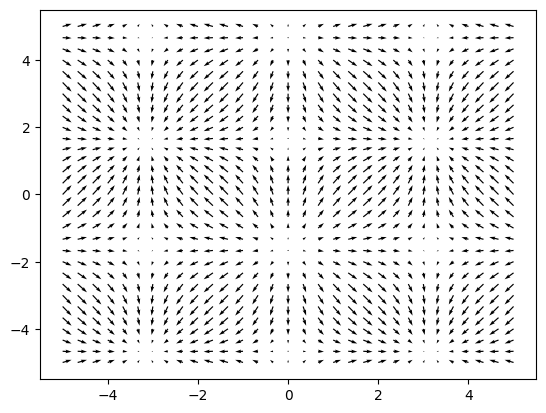

In [5]:
range = np.linspace(-5, 5, 31)
X, Y = np.meshgrid(range, range)
plt.quiver(X, Y, np.sin(X), np.cos(Y))

We can put our leaf in the puddle and watch it move - although, we can't give it a push just yet. Our leaf has no information beyond the field and its position so we can't give it an inital velocity just yet.

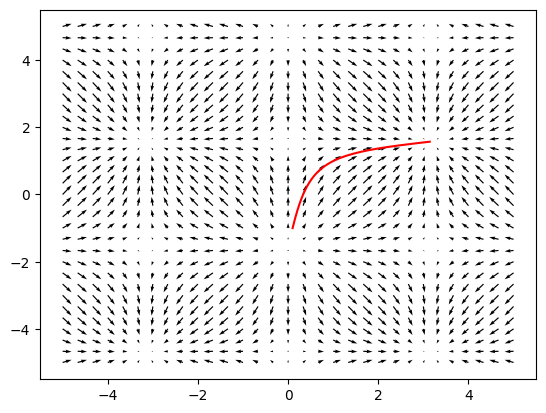

In [6]:
# inital conditions
X_pos = [0.1]
Y_pos = [-1]

# iterative approximation of position
time_step = 0.05
for i in np.arange(0, 1000, 1):
    X_i = X_pos[-1] + np.sin(X_pos[-1])*time_step
    X_pos.append(X_i)
    Y_i = Y_pos[-1] + np.cos(Y_pos[-1])*time_step
    Y_pos.append(Y_i)
    
plt.quiver(X, Y, np.sin(X), np.cos(Y))
plt.plot(X_pos, Y_pos, color='red')

But this still isn't enough. We've modeled a constant field on the leaf... So what to do when we give the leaf a push? The model that we've built so far is not enough to handle this, but it does give us some of the groundwork that we need. 

How do we model a force on an object? So far, we have kept track of position and used the vector field to determine Velocity. Next, we can keep track of velocity, can use the vector field to model Acceleration. This gives us the basis for our next model: a thrown baseball, a common parabola.

We have modeled a force acting on an object with a position and a velocity. 

This model shows a constant force.

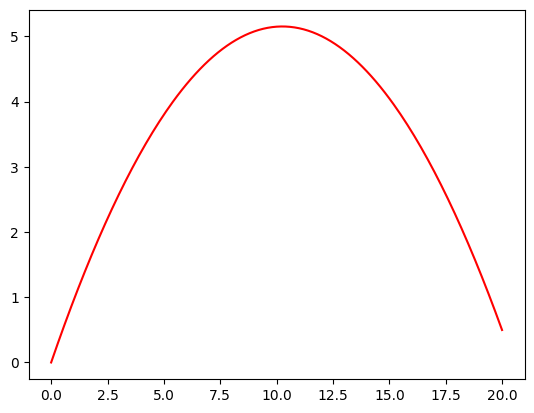

In [7]:
# inital position
X_pos = [0]
Y_pos = [0]
# inital velocity
V_x = [10]
V_y = [10]

time_step = 0.01

for i in np.arange(0, 200, 1):
    # update the position first
    X_i = X_pos[-1] + V_x[-1]*time_step
    X_pos.append(X_i)
    Y_i = Y_pos[-1] + V_y[-1]*time_step
    Y_pos.append(Y_i)

    # update the velocity
    V_ix = V_x[-1] + 0*time_step
    V_x.append(V_ix)  
    V_iy = V_y[-1] + -9.8*time_step
    V_y.append(V_iy)

plt.plot(X_pos, Y_pos, color='red')

We know the general idea, so we can simplify this. The folowing code does exactly the same thing, but we abstract the approximation step. We will also be using a different methods later on, as we see our error margin increase. L(o_o) We can also work on simulating dynamic forces and cleaning up some of the cruft we've accumulated.

In [8]:
def linear_approximation(I, Di, time_step):
    I = np.add(I, np.multiply(Di, time_step))
    return np.array([I])

def easy_grav():
    return np.array([0,-9.8])

def grav_force(particle_list, target):
    # F = G*(M1*M2)/R**2, but we consider G*M*m = 1, for fun c(OwOc)
    # G = 6.67430 * 10 **-11
    force_vector = np.array([0, 0])
    for i in np.arange(0, len(particles), 1):
        if i != target:
            v = particles[i].get_position() - particle_list[target].get_position()
            force_vector = force_vector + 0.2*v/np.linalg.norm(v)**3 
    return force_vector

Rather than try and manage multiple particles, we define a object to handle this for us and simplify our code.

In [9]:
class Simple_Particle:
    def __init__(self, position, velocity):
        self.position = np.array(position)
        self.velocity = np.array(velocity)

    def get_position(self):
        return self.position[-1]

    def get_velocity(self):
        return self.velocity[-1]

    def get_X(self):
        return self.position[:,0]

    def get_Y(self):
        return self.position[:,1]
        
    def update_position(self):
        partial = linear_approximation(self.position[-1], self.velocity[-1], 0.005)
        self.position = np.concatenate((self.position, partial))
        
    def update_velocity(self, force):
        partial = linear_approximation(self.velocity[-1], force, 0.005)
        self.velocity = np.concatenate((self.velocity, partial))

Let's check to make sure that this code does what we think it does. If this works, it shoud be identical to the code that we wrote earlier to model a baseball throw.

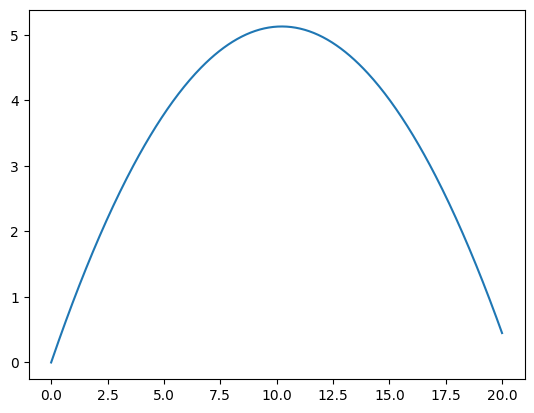

In [10]:
particles = []
particles.append(Simple_Particle([[0, 0]], [[10, 10]]))

for i in np.arange(0, 400, 1):
     for j in np.arange(0, len(particles), 1):
         particles[j].update_position()
         particles[j].update_velocity(easy_grav())

for i in np.arange(0, len(particles), 1):
    plt.plot(particles[i].get_X(), particles[i].get_Y())

Success! Now we can model our N-Body Problem that we've tried to get to. This can model basic trajectories and how the particles of similar size move, although obviously we are simplifiying things by abstracting out gravitational constants, mass, size, and an entire dimension.

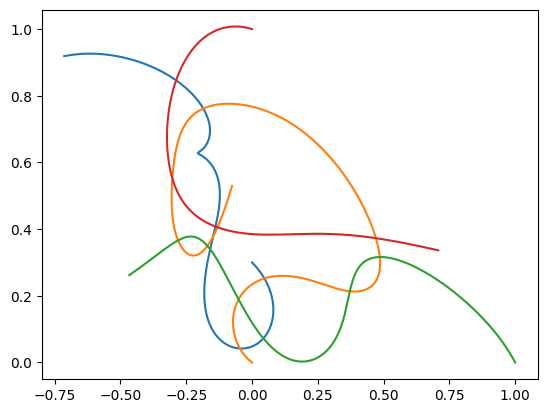

In [13]:
particles = []
particles.append(Simple_Particle([[0, 0.3]], [[0.5, -0.4]]))
particles.append(Simple_Particle([[0, 0]], [[-0.5, 0.3]]))
particles.append(Simple_Particle([[1, 0]], [[-0.2, 0.3]]))
particles.append(Simple_Particle([[0, 1]], [[-0.4, 0.1]]))

for i in np.arange(0, 500, 1):
     for j in np.arange(0, len(particles), 1):
         particles[j].update_position()
         particles[j].update_velocity(grav_force(particles, j))

for i in np.arange(0, len(particles), 1):
    plt.plot(particles[i].get_X(), particles[i].get_Y())

Delicious Spagettii. :)